Test out dominant column in relation to eigenvalues

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# create random matrix
m = 100  # number of columns
n = 200  # number of rows
A = np.random.rand(n, m)
A_copy = A.copy()

# create random vector
b = np.random.rand(n)



(200,)

In [23]:
# angle between b and first eignevector of A
angles = []
multiple_of_b = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
column_to_add_to = 3

for i in range(len(multiple_of_b)):
    added_column = b * multiple_of_b[i]
    A[:, column_to_add_to] = A_copy[:, column_to_add_to] + added_column
    
    _, v = np.linalg.eig(A @ A.T)

    angle = np.arccos(np.dot(b, v[:, 0]) / (np.linalg.norm(b) * np.linalg.norm(v[:, 0])))
    # in degrees

    angles.append(angle)

In [ ]:
np.pi/2

1.5707963267948966

d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


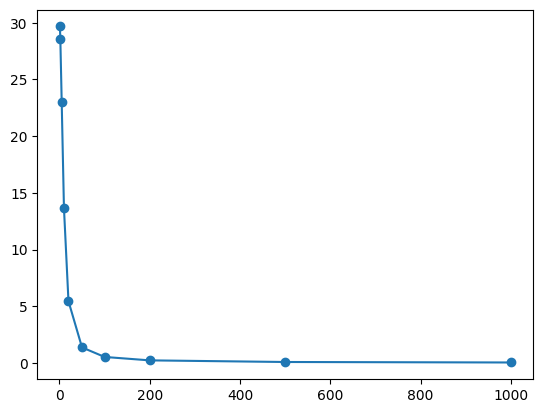

In [28]:
plt.plot(multiple_of_b, [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles], marker='o')

In [45]:
angles_all = []

for i in range(len(multiple_of_b)):
    added_column = b * multiple_of_b[i]
    # tile the added column to match the shape of A
    added_column = np.tile(added_column, (m, 1)).T
    A = A_copy + added_column
    
    _, v = np.linalg.eig(A @ A.T)

    angle = np.arccos(np.dot(A[:,0], v[:, 0]) / (np.linalg.norm(A[:,0]) * np.linalg.norm(v[:, 0])))
    # in degrees

    angles_all.append(angle)

In [32]:
len(added_column)

200

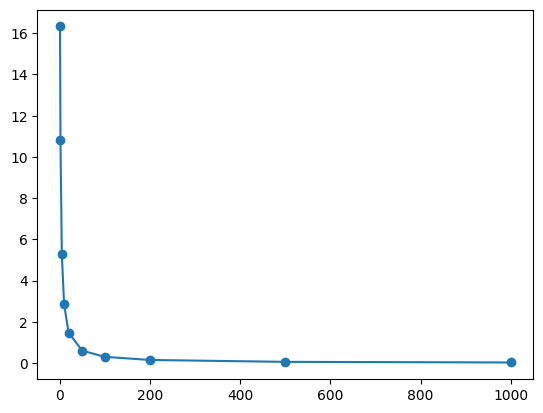

In [46]:
plt.plot(multiple_of_b, [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles_all], marker='o')